* Course    : CS513 - Knowledge Discovery and Data Mining
* First Name: John
* Last Name : Rizzo
* Student ID: 20036833
* Purpose   : Midterm

In [ ]:
# Load depdencies
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

%matplotlib inline

# Problem #3

In [2]:
# Load hepatitis_A.csv dataset
coltype = {
    'Class': 'Int64',
    'AGE': 'Int64',
    'SEX': 'Int64',
    'STERIOD': 'Float64',
    'ANTIVIRALS': 'Int64',
    'FATIGUE': 'Float64',
    'MALAISE': 'Float64',
    'ANOREXIA': 'Float64',
    'LIVER_BIG': 'Float64',
    'LIVER_FIRM': 'Float64',
    'SPLEEN_PALPABLE': 'Float64',
    'SPIDERS': 'Float64',
    'ASCITES': 'Float64',
    ' VARICES': 'Float64',
    'BILIRUBIN': 'Float64',
    'ALK_PHOSPHATE': 'Float64',
    'SGOT': 'Float64',
    'ALBUMIN': 'Float64',
    'HISTOLOGY': 'Int64',
    'Age_Quartile': 'category'
}

folder = '../data/'

df = pd.read_csv(folder+'hepatitis_A.csv', dtype=coltype)


In [3]:
# Getting an idea of the overall feel of the data
print(f"Shape: {df.shape}")
print(df.describe())

Shape: (155, 20)
          Class        AGE       SEX     STEROID  ANTIVIRALS   FATIGUE  \
count     155.0      155.0     155.0  154.000000       155.0     154.0   
mean   1.793548       41.2  1.103226    1.506494    1.845161  1.350649   
std     0.40607  12.565878   0.30524    0.501589    0.362923   0.47873   
min         1.0        7.0       1.0    1.000000         1.0       1.0   
25%         2.0       32.0       1.0    1.000000         2.0       1.0   
50%         2.0       39.0       1.0    2.000000         2.0       1.0   
75%         2.0       50.0       1.0    2.000000         2.0       2.0   
max         2.0       78.0       2.0    2.000000         2.0       2.0   

        MALAISE  ANOREXIA  LIVER_BIG  LIVER_FIRM  SPLEEN_PALPABLE   SPIDERS  \
count     154.0     154.0      145.0       144.0            150.0     150.0   
mean   1.603896  1.792208   1.827586    1.583333              1.8      1.66   
std    0.490682  0.407051   0.379049    0.494727          0.40134  0.475296   


array([[<Axes: xlabel='BILIRUBIN', ylabel='BILIRUBIN'>,
        <Axes: xlabel='SGOT', ylabel='BILIRUBIN'>],
       [<Axes: xlabel='BILIRUBIN', ylabel='SGOT'>,
        <Axes: xlabel='SGOT', ylabel='SGOT'>]], dtype=object)

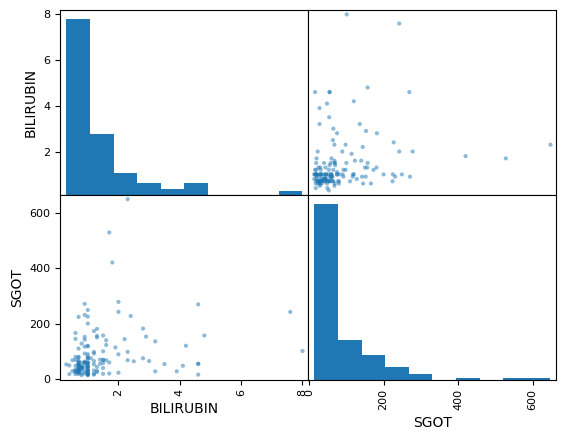

In [4]:
# Displaying scatter plots of "BILIRUBIN", "SGOT", and "ALBUMIN"
# one pair at a atime

pd.plotting.scatter_matrix(df[['BILIRUBIN', 'SGOT']])

array([[<Axes: xlabel='BILIRUBIN', ylabel='BILIRUBIN'>,
        <Axes: xlabel='ALBUMIN', ylabel='BILIRUBIN'>],
       [<Axes: xlabel='BILIRUBIN', ylabel='ALBUMIN'>,
        <Axes: xlabel='ALBUMIN', ylabel='ALBUMIN'>]], dtype=object)

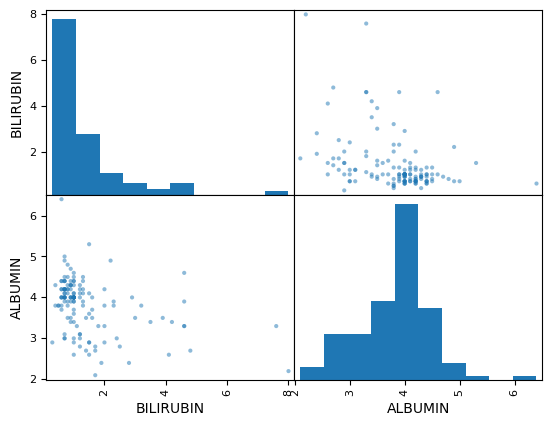

In [5]:
pd.plotting.scatter_matrix(df[['BILIRUBIN', 'ALBUMIN']])

array([[<Axes: xlabel='SGOT', ylabel='SGOT'>,
        <Axes: xlabel='ALBUMIN', ylabel='SGOT'>],
       [<Axes: xlabel='SGOT', ylabel='ALBUMIN'>,
        <Axes: xlabel='ALBUMIN', ylabel='ALBUMIN'>]], dtype=object)

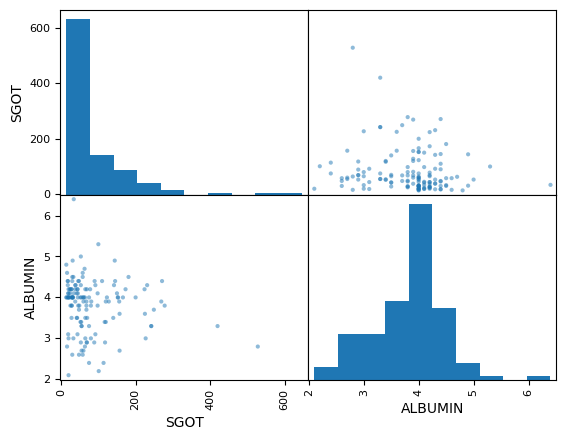

In [6]:
pd.plotting.scatter_matrix(df[['SGOT', 'ALBUMIN']])

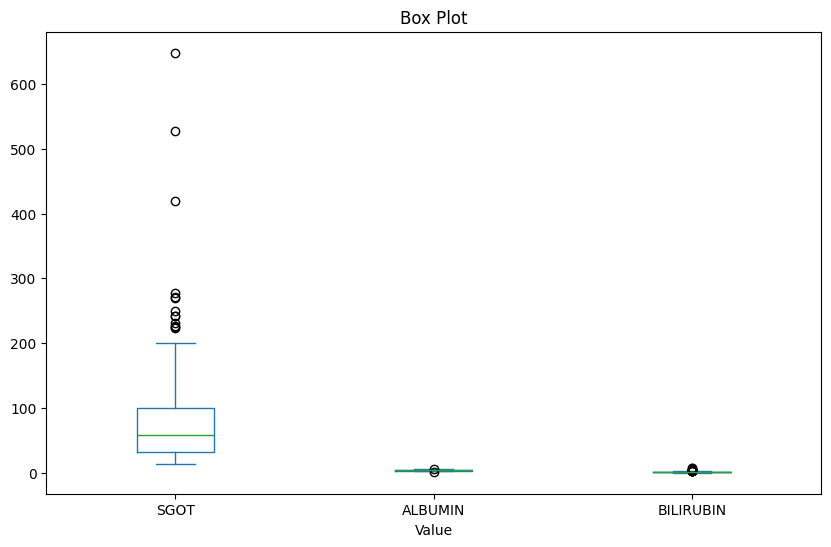

In [7]:
df[['SGOT', 'ALBUMIN', 'BILIRUBIN']].plot(kind='box', vert=True, figsize=(10, 6))
plt.title("Box Plot", fontsize=12)
plt.xlabel("Value")
plt.show()

# Problem 4

In [15]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,...,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Age_Quartile_Q2,Age_Quartile_Q3,Age_Quartile_Q4
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,1.0,85.0,18.0,4.0,1,False,False,False
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,...,2.0,2.0,0.9,135.0,42.0,3.5,1,False,True,False
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.7,96.0,32.0,4.0,1,False,False,True
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.7,46.0,52.0,4.0,1,False,False,False
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,<NA>,200.0,4.0,1,True,False,False


In [16]:
df= pd.get_dummies(df, drop_first=True)
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,...,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Age_Quartile_Q2,Age_Quartile_Q3,Age_Quartile_Q4
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,1.0,85.0,18.0,4.0,1,False,False,False
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,...,2.0,2.0,0.9,135.0,42.0,3.5,1,False,True,False
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.7,96.0,32.0,4.0,1,False,False,True
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.7,46.0,52.0,4.0,1,False,False,False
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,<NA>,200.0,4.0,1,True,False,False


Class
2    123
1     32
Name: count, dtype: Int64
Class
2    79.354839
1    20.645161
Name: count, dtype: Float64


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,...,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Age_Quartile_Q2,Age_Quartile_Q3,Age_Quartile_Q4
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,1.0,85.0,18.0,4.0,1,False,False,False
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,...,2.0,2.0,0.9,135.0,42.0,3.5,1,False,True,False
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.7,96.0,32.0,4.0,1,False,False,True
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.7,46.0,52.0,4.0,1,False,False,False
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,<NA>,200.0,4.0,1,True,False,False


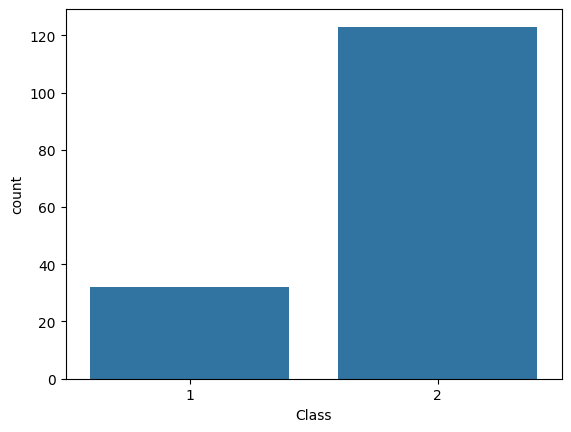

In [17]:
print(  df['Class'].value_counts())
print( (df['Class'].value_counts()/ df['Class'].value_counts().sum()) * 100)

sns.countplot(data=df, x='Class')
df.head()

In [11]:
attr = df.drop(['Class', 
                'AGE', 
                'ANTIVIRALS', 
                'ANOREXIA', 
                'LIVER_BIG', 
                'LIVER_FIRM',
                'SPLEEN_PALPABLE',
                'SPIDERS',
                'ASCITES',
                ' VARICES',
                'BILIRUBIN',
                'ALK_PHOSPHATE',
                'SGOT',
                'ALBUMIN',
                'HISTOLOGY'
                ], axis=1)
target = df['Class']

attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=6)

In [12]:
model = DecisionTreeClassifier()
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

In [13]:
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[ 3  5]
 [12 27]]
              precision    recall  f1-score   support

         1.0       0.20      0.38      0.26         8
         2.0       0.84      0.69      0.76        39

    accuracy                           0.64        47
   macro avg       0.52      0.53      0.51        47
weighted avg       0.73      0.64      0.68        47



In [14]:
plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);

# Problem 5

In [18]:
# Load hepatitis_A.csv dataset
coltype = {
    'Class': 'Int64',
    'AGE': 'Int64',
    'SEX': 'Int64',
    'STERIOD': 'Float64',
    'ANTIVIRALS': 'Int64',
    'FATIGUE': 'Float64',
    'MALAISE': 'Float64',
    'ANOREXIA': 'Float64',
    'LIVER_BIG': 'Float64',
    'LIVER_FIRM': 'Float64',
    'SPLEEN_PALPABLE': 'Float64',
    'SPIDERS': 'Float64',
    'ASCITES': 'Float64',
    ' VARICES': 'Float64',
    'BILIRUBIN': 'Float64',
    'ALK_PHOSPHATE': 'Float64',
    'SGOT': 'Float64',
    'ALBUMIN': 'Float64',
    'HISTOLOGY': 'Int64',
    'Age_Quartile': 'category'
}

folder = '../data/'

df = pd.read_csv(folder+'hepatitis_B2.csv', dtype=coltype)

In [23]:
attr = df.drop(columns=['Class',
                        'STEROID',
                        'ANTIVIRALS',
                        'FATIGUE',
                        'MALAISE',
                        'ANOREXIA',
                        'LIVER_BIG',
                        'LIVER_FIRM',
                        'SPLEEN_PALPABLE',
                        'SPIDERS',
                        ' VARICES',
                        'HISTOLOGY',
                        'Age_Quartile'
                        ])
target = df['Class']

scalar = MinMaxScaler()
attr = pd.DataFrame(scalar.fit_transform(attr), columns=attr.columns)

In [25]:
random_state = 42
random.seed(random_state)

# Splitting training set into 30% test and 70% train
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size=0.3,
                                                                    random_state=random_state,
                                                                    shuffle=True)

In [26]:
k_values = [1, 3, 5, 7]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
    accuracy = accuracy_score(target_test, target_pred)
    print(f'Accuracy for k={k}: {accuracy:.3f}')

Accuracy for k=1: 0.667
Accuracy for k=3: 0.750
Accuracy for k=5: 0.750
Accuracy for k=7: 0.750


In [27]:
cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))

Confusion Matrix
[[4 2]
 [1 5]]

Accuracy score
0.75

Classification Report
              precision    recall  f1-score   support

         1.0       0.80      0.67      0.73         6
         2.0       0.71      0.83      0.77         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



In [28]:
test_actual=attr_test
test_actual['target_pred']=target_pred
test_actual['test_actual']=target_test
test_actual.head()

,AGE,SEX,ASCITES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,target_pred,test_actual
19,0.142857,1.0,1.0,0.136364,0.170213,0.008584,0.678571,2.0,2
16,0.482143,0.0,1.0,0.227273,0.170213,0.231760,0.500000,2.0,1
15,0.446429,0.0,0.0,0.136364,0.514894,0.060086,0.178571,1.0,1
26,0.142857,0.0,1.0,0.409091,0.051064,0.549356,1.000000,2.0,2
4,0.285714,0.0,0.0,0.181818,0.310638,0.000000,0.250000,1.0,1


In [29]:
freq_table = pd.crosstab(test_actual['test_actual'], test_actual['target_pred'])
print("Confusion Matrix")
print(freq_table)

Confusion Matrix
target_pred  1.0  2.0
test_actual          
1              4    2
2              1    5
